In [1]:
'''
Cubic spline plot

This script has several functions:

- Estimate a cubic spline for one X and one Y
- Plot the raw data as a scatter plot
- Plot the cubic spline as a line plot

Specific to Linux:
time -f '%e' ./cubic_spline.py
./cubic_spline.py
'''

"\nCubic spline plot\n\nThis script has several functions:\n\n- Estimate a cubic spline for one X and one Y\n- Plot the raw data as a scatter plot\n- Plot the cubic spline as a line plot\n\nSpecific to Linux:\ntime -f '%e' ./cubic_spline.py\n./cubic_spline.py\n"

In [2]:
#! /usr/bin/env python3

'''
Cubic spline plot

This script has several functions:

- Estimate a cubic spline for one X and one Y
- Plot the raw data as a scatter plot
- Plot the cubic spline as a line plot

Specific to Linux:
time -f '%e' ./cubic_spline.py
./cubic_spline.py
'''

"\nCubic spline plot\n\nThis script has several functions:\n\n- Estimate a cubic spline for one X and one Y\n- Plot the raw data as a scatter plot\n- Plot the cubic spline as a line plot\n\nSpecific to Linux:\ntime -f '%e' ./cubic_spline.py\n./cubic_spline.py\n"

In [3]:
import numpy as np
import matplotlib.axes as axes
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline as cs

In [4]:
c = cm.Paired.colors

In [5]:
def main():
    x_axis_label, y_axis_label, axis_title, graph_file_name = (
        'Independent value',
        'Dependent value',
        'Cubic Spline',
        'cubic_spline.svg'
    )
    raw_data_x_values, raw_data_y_values = read_data_file()
    spline_data_x_values, spline_data_y_values = estimate_cubic_spline(
            raw_data_x_values,
            raw_data_y_values
    )
    plot_scatter_line(
       raw_data_x_values, raw_data_y_values,
       spline_data_x_values, spline_data_y_values,
       x_axis_label, y_axis_label, axis_title, graph_file_name
    )

In [6]:
def read_data_file():
    '''
    The data file is presumed to have an index (row names or values),
    a first column with x values, and a second column with y values.
    '''
    while True:
        file_name = input('CSV file name to read? ')
        try:
            data = pd.read_csv(file_name, index_col=None)
        except FileNotFoundError:
            print(f'File {file_name} does not exist. Please try again.')
        else:
            return data.iloc[:, 0], data.iloc[:, 1]

In [7]:
def estimate_cubic_spline(raw_data_x_values, raw_data_y_values):
    minimum = raw_data_x_values.min()
    maximum = raw_data_x_values.max()
    increment = (maximum - minimum)/100
    spline_data_x_values = np.arange(minimum, maximum + increment, increment)
    spline_data_y_values = cs(raw_data_x_values, raw_data_y_values)
    return spline_data_x_values, spline_data_y_values

In [8]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [9]:
def plot_scatter_line(
        raw_data_x_values, raw_data_y_values,
        spline_data_x_values, spline_data_y_values,
        x_axis_label, y_axis_label, axis_title, graph_file_name
):
    figure_width_height = (8, 6)
    fig = plt.figure(figsize=figure_width_height)
    ax = fig.add_subplot(111)
    ax.plot(
        raw_data_x_values,
        raw_data_y_values,
        marker='o',
        linestyle='None',
        color=c[1],
        label='data'
    )
    ax.plot(
        spline_data_x_values,
        spline_data_y_values(spline_data_x_values),
        marker='None',
        linestyle='-',
        color=c[5], label='cubic spline'
    )
    ax.set_title(axis_title, fontweight='bold')
    ax.set_xlabel(x_axis_label, fontweight='bold')
    ax.set_ylabel(y_axis_label, fontweight='bold')
    ax.legend(frameon=False)
    despine(ax)
    ax.figure.savefig(graph_file_name, format='svg')
    return

CSV file name to read? cubic_spline_raw_data.csv


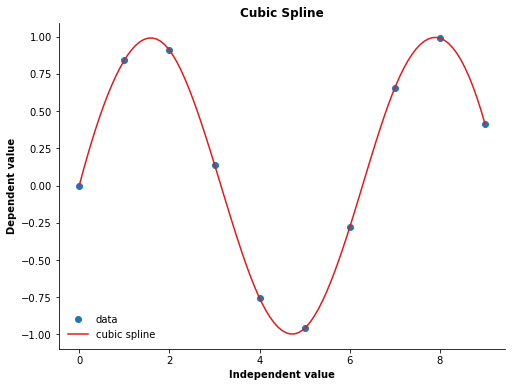

In [10]:
if __name__ == '__main__':
    main()